In [1]:
import os
import fsspec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from classy import Class

In [3]:
#parameters for varying of mass of interacting dark matter
parameters = {'output':'tCl, pCl, lCl, mPk',
              'lensing':'yes',
              'f_idm':.9,
              'cross_idm_b':1e-33,
              'n_index_idm_b': -2,
              'l_max_scalars': 4150
             }

param_var = 'm_idm' #define varying parameter
param_var_array = np.logspace(6, 10, 5) #values to vary

In [4]:
#basic CMB parameters with no interacting dark matter
basic_parameters = {'output':'tCl, pCl, lCl, mPk',
                    'lensing':'yes',
                    'l_max_scalars': 4150
              }

cosmo = Class()
cosmo.set(basic_parameters)
cosmo.compute()

basic_cls = cosmo.lensed_cl(4150) #basic Cls

basic_ll = basic_cls['ell'][2:]
basic_clTT = basic_cls['tt'][2:] 
basic_clEE = basic_cls['ee'][2:] 
basic_clTE = basic_cls['te'][2:]
cosmo.struct_cleanup() #prepare cosmo for idm parameters
cosmo.empty()

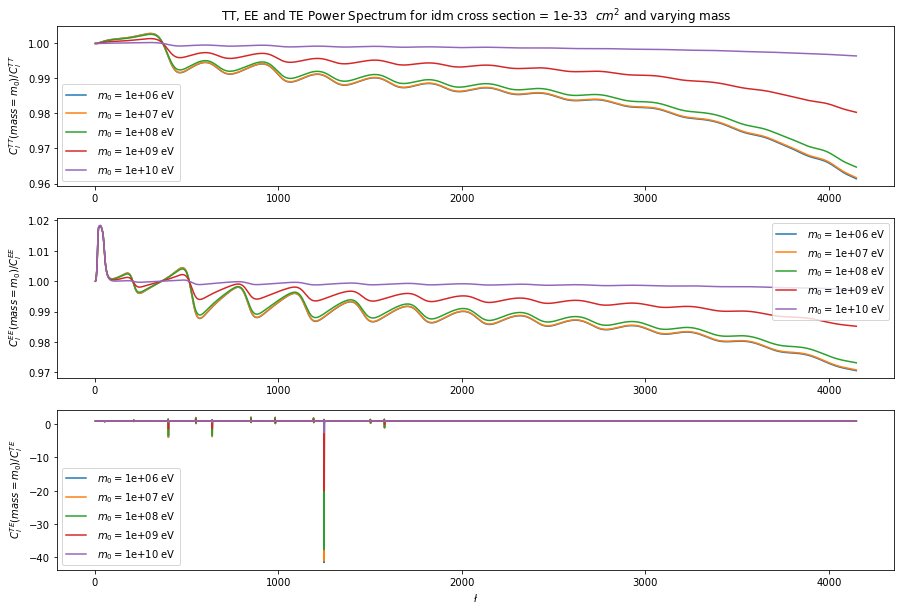

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15,10)) #generate plots

for i, var in enumerate(param_var_array):
    cosmo.set(parameters) #set idm parameters
    cosmo.set({param_var:var}) #set mass varying parameters
    cosmo.compute()
    cls = cosmo.lensed_cl(4150) #idm Cls
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:] 
    clEE = cls['ee'][2:] 
    clTE = cls['te'][2:]
    #plotting
    ax1.set_title("TT, EE and TE Power Spectrum for idm cross section = 1e-33 $\ cm^2$ and varying mass")
    ax3.set_xlabel('$\l$')
    ax1.set_ylabel('$\ C_l^{TT}(mass = m_0)/C_l^{TT}$')
    ax2.set_ylabel('$\ C_l^{EE}(mass = m_0)/C_l^{EE}$')
    ax3.set_ylabel('$\ C_l^{TE}(mass = m_0)/C_l^{TE}$')
    ax1.plot(ll, clTT/basic_clTT, label = '$\ m_0 =$' + str("{:.0e}".format((param_var_array[i]))) + ' eV')
    ax2.plot(ll, clEE/basic_clEE, label = '$\ m_0 =$' + str("{:.0e}".format((param_var_array[i]))) + ' eV')
    ax3.plot(ll, clTE/basic_clTE, label = '$\ m_0 =$' + str("{:.0e}".format((param_var_array[i]))) + ' eV')
    cosmo.struct_cleanup() #prepare cosmo for next loop
    cosmo.empty()
    
ax1.legend()
ax2.legend()
ax3.legend()